In [1]:
# This code implements the Chebyshev approximation criterion for fitting a model to a dataset.

import matplotlib.pyplot as plt
import scipy.optimize as optimize

def Cheby(params):
    # print(params)  # <-- you'll see that params is a NumPy array.  For this example, params is a single element.  But it could be a larger array.
    a = params # <-- for readability you may wish to assign names to the component variables
    
    speed = [x for x in range(0,17)]
    StoppingData = [0, 3, 6, 11, 21, 32, 47, 65, 87, 112, 140, 171, 204, 241, 282, 325, 376]
    
    residual = [y - a*(x**2) for y,x in zip(StoppingData, speed)] 
    abs_residual = [abs(x) for x in residual]
    max_abs_resid = max(abs_residual)
    return max_abs_resid

initial_guess = 1  # If you want to do multivariate optimization, initialize this as a list rather than a single value.

# Here you pass the function that you want to optimize, along with an initial guess, to the minimize function.
result = optimize.minimize(Cheby, initial_guess)  

fitted_params = result.x  # This is the value we want, the value of the parameter that minimizes the function.
print(fitted_params)

[1.44590164]


In [2]:
speed = [x for x in range(0,17)]
StoppingData = [0, 3, 6, 11, 21, 32, 47, 65, 87, 112, 140, 171, 204, 241, 282, 325, 376]

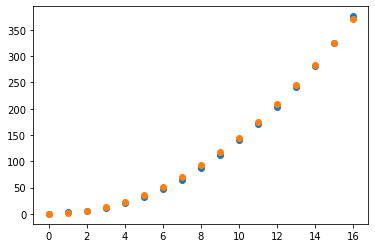

In [3]:
predict = [fitted_params*(x**2) for x in speed] 
plt.scatter(speed, StoppingData)
plt.scatter(speed, predict)

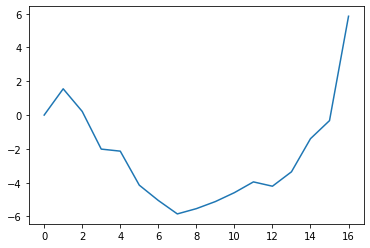

In [4]:
residual = [y-x for y,x in zip(StoppingData,predict)]
plt.plot(residual)

In [7]:
import math

def Chebylog(params):
    # print(params)  # <-- you'll see that params is a NumPy array
    a = params # <-- for readability you may wish to assign names to the component variables
    
    speed = [x for x in range(0,17)]
    logspeed = [math.log(x) for x in speed[1:]]
    StoppingData = [0, 3, 6, 11, 21, 32, 47, 65, 87, 112, 140, 171, 204, 241, 282, 325, 376]
    logStop = [math.log(x) for x in StoppingData[1:]]
    
    residual = [y - math.log(a) - 2*x for y,x in zip(logStop, logspeed)] 
    abs_residual = [abs(x) for x in residual]
    max_abs_resid = max(abs_residual)
    return max_abs_resid

initial_guess = 1

result = optimize.minimize(Chebylog, initial_guess)  

fitted_params_log = result.x 
print(fitted_params_log)

[1.91485421]


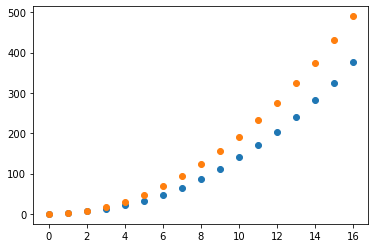

In [8]:
predictlog = [fitted_params_log*(x**2) for x in speed] 
plt.scatter(speed, StoppingData)
plt.scatter(speed, predictlog)